# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!pip install --upgrade pip
!pip install gdown


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import gdown
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y

Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x000001245692FE90>: Failed to resolve 'drive.google.com' ([Errno
	11001] getaddrinfo failed)"))

To report issues, please visit https://github.com/wkentaro/gdown/issues.
Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x00000292158C0050>: Failed to resolve 'drive.google.com' ([Errno
	11001] getaddrinfo failed)"))

To report issues, please visit https://github.com/wkentaro/gdown/issues.
Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y (Caused by
	NameResolutionError("<urllib3.connection.HTTPSConnection object at
	0x00

In [5]:
data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
data_submission = pd.read_csv('./submission.csv')

In [6]:
data_train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2953,4,25.30,116.95,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
1268,58,108.85,6287.25,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1
4840,61,64.05,3902.6,Male,1,Yes,No,Yes,Yes,DSL,No,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),0
3115,13,55.95,734.35,Female,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,1
2806,67,85.25,5714.2,Female,0,No,No,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,0


In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
data_train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [10]:
data_submission.isna().sum()

Id       0
Churn    0
dtype: int64

Как видим, нам повезло, нет пропусков

Но нужно преобразовать TotalSpend в число

In [11]:
for i in set(data_train['TotalSpent'].values):
    try:
        float(i)
    except ValueError:
        print("'" + i + "'")

' '


в Totalspent train'a все значения переводятся в числа кроме " ", заменим все невалидные числа на 0

In [12]:
data_train['TotalSpent'] = pd.to_numeric(data_train['TotalSpent'], errors='coerce')
data_test['TotalSpent'] = pd.to_numeric(data_test['TotalSpent'], errors='coerce')
data_train['TotalSpent'] = data_train['TotalSpent'].fillna(0)
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Для числовых признаков не имеет смысла объединять все графики в один, тк графики относящиеся к одной фиче будут все равно друг под другом, а вот для категориальных объединим

In [13]:
def draw_numeric_features(data, feature_name):
    fig, axes = plt.subplots(2, 1, figsize=(20, 20))
    axes[0].hist(data[feature_name], bins=80)
    axes[0].set_title('Hist for ' + feature_name)

    axes[1].boxplot(data[feature_name])
    axes[1].set_title('Boxplot for ' + feature_name)

    plt.show()

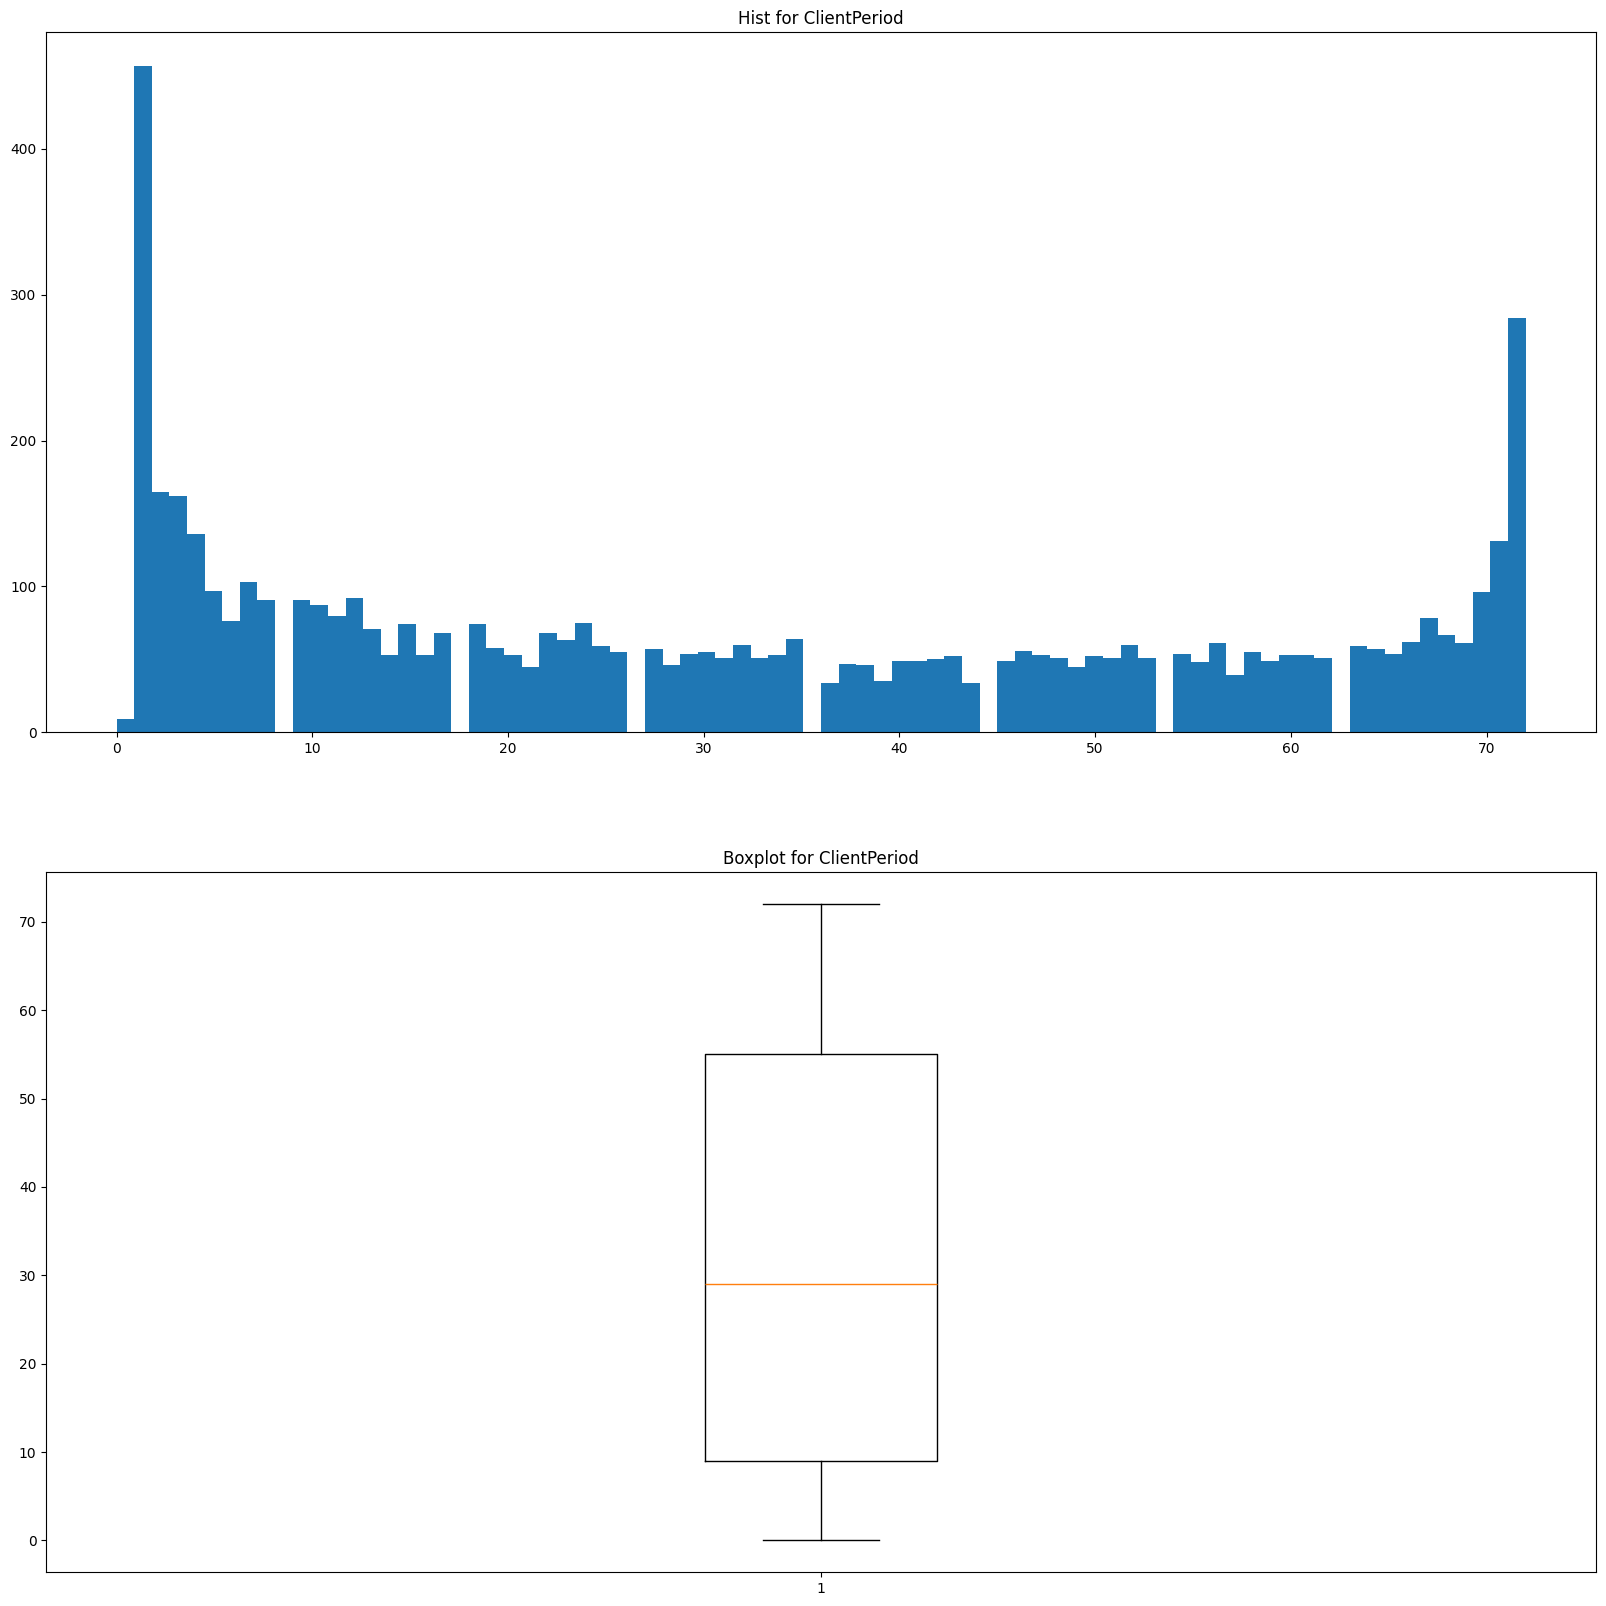

In [14]:
draw_numeric_features(data_train, 'ClientPeriod')

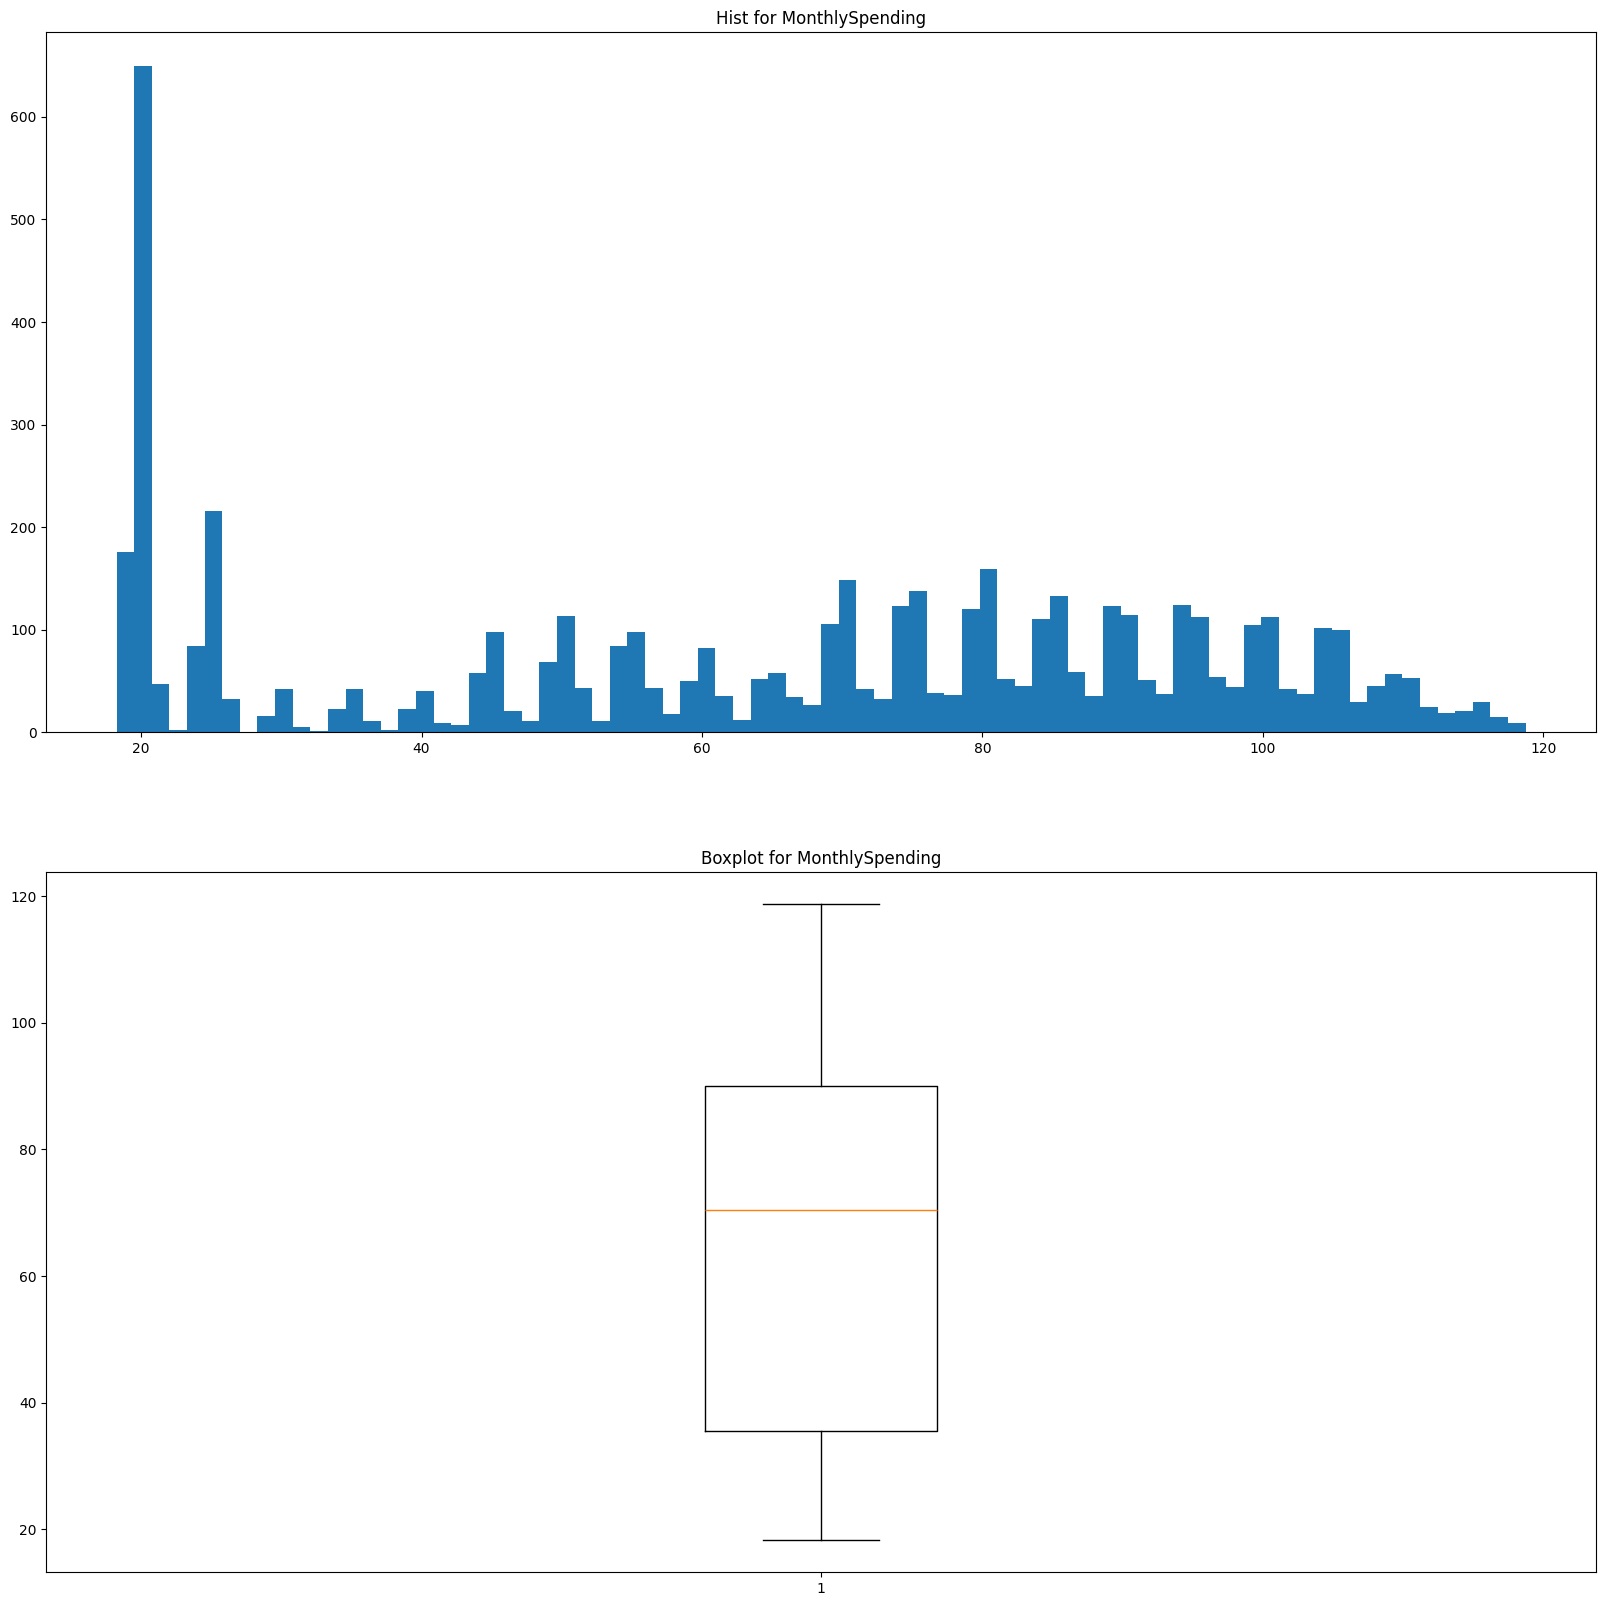

In [15]:
draw_numeric_features(data_train, 'MonthlySpending')

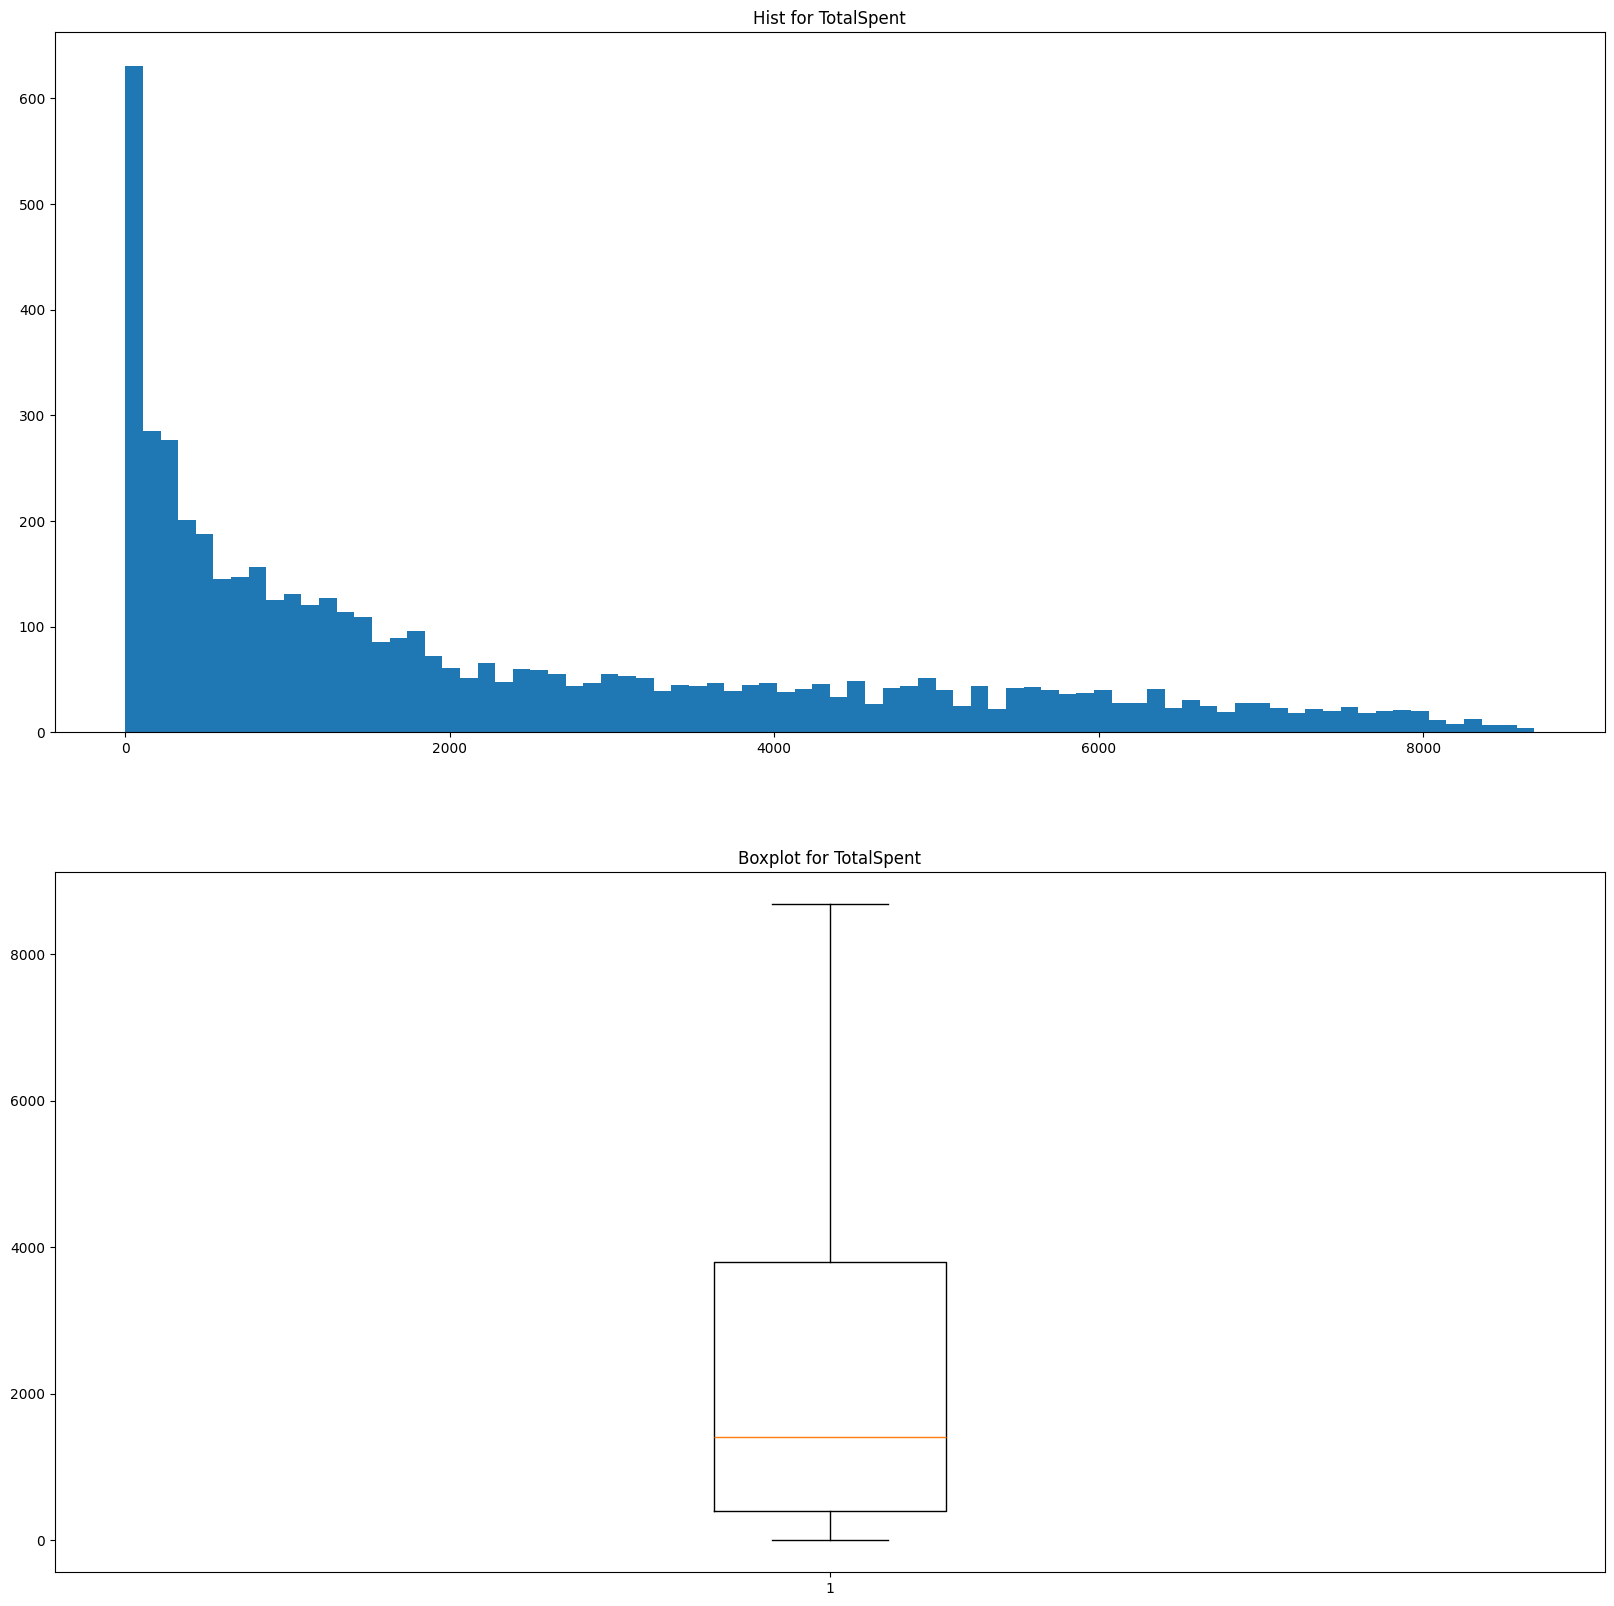

In [16]:
draw_numeric_features(data_train, 'TotalSpent')

In [17]:
def draw_categorical_features(data, features_list):
    fig, axes = plt.subplots(len(features_list), 2, figsize=(10, 5 * len(features_list)))

    for i, feature_name in enumerate(features_list):
        sub_data = data.groupby(feature_name).aggregate({'ClientPeriod': 'count'}).reset_index().rename(
            columns={'ClientPeriod': 'count'})

        # Используем правильные индексы для осей
        axes[i, 0].bar(sub_data[feature_name], sub_data['count'])
        axes[i, 0].set_title('Bar for ' + feature_name)

        axes[i, 1].pie(x=sub_data['count'], labels=sub_data[feature_name])
        axes[i, 1].set_title('Pie for ' + feature_name)

    plt.tight_layout()  # Автоматическая подгонка расстояния между графиками
    plt.show()

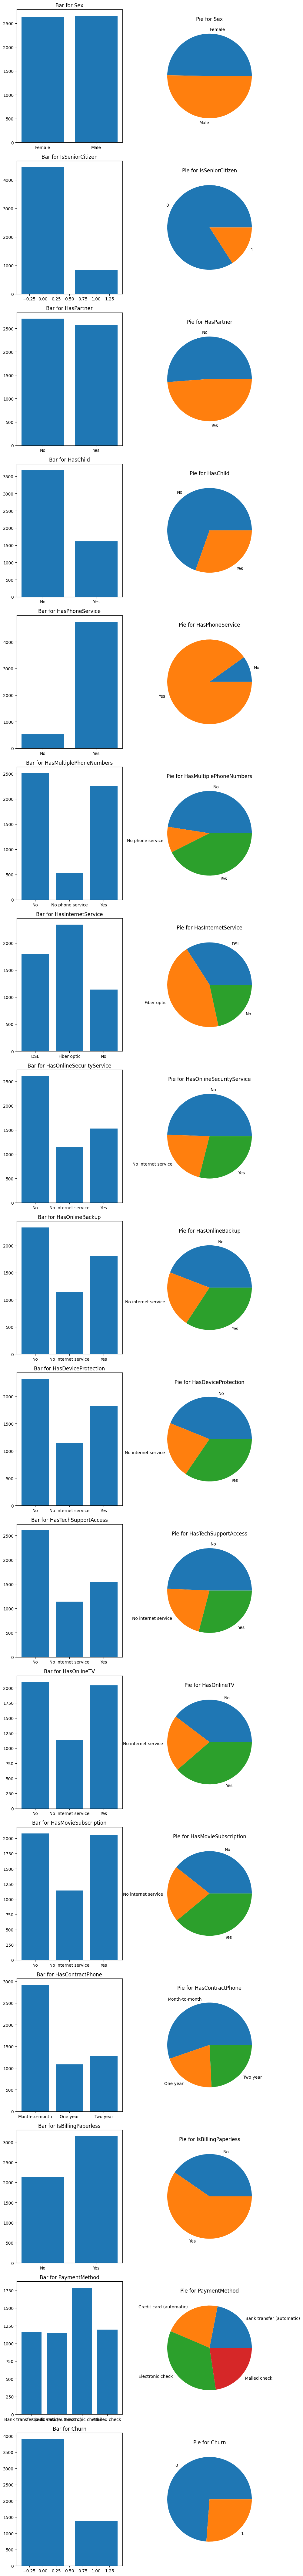

In [77]:
draw_categorical_features(data_train, cat_cols + [target_col])

на последнем графике видим, что целевая переменная не сбалансированная, люди чаще не уходят

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ('scaling', StandardScaler(), num_cols)
])

In [21]:
logistic_regression_pipeline = Pipeline(steps=[
    ('grid_and_preprocessing', column_transformer),
    ('regression', LogisticRegression())
])

In [112]:
searcher = GridSearchCV(logistic_regression_pipeline, [{"regression__C": np.logspace(-3, 2, 6)}], scoring="roc_auc",
                        cv=5)

In [113]:
searcher.fit(data_train[feature_cols], data_train[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('grid_and_preprocessing',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod']),
                                                                        ('scaling',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent'])])),
                                       ('regression', LogisticRegression())]),
             param_grid=[{'regression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}],
             scoring='roc_auc')

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [114]:
searcher.best_params_

{'regression__C': 10.0}

In [25]:
best_logistic_model = searcher.best_estimator_

In [116]:
roc_auc_score(data_train[target_col], best_logistic_model.predict_proba(data_train[feature_cols])[:, 1])

0.8490472919267922

давайте посмотрим на рок кривую

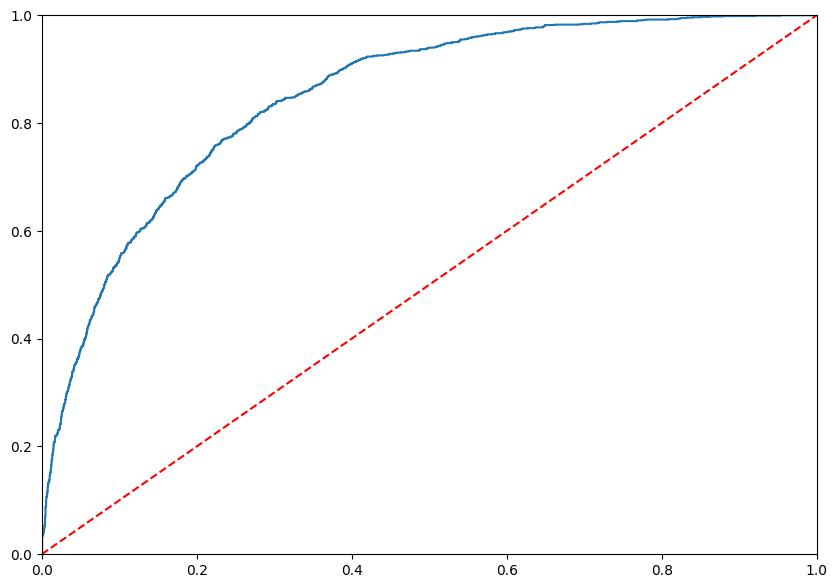

In [88]:
from sklearn.metrics import roc_curve

y_pred = best_logistic_model.predict_proba(data_train[feature_cols])[:, 1]
test_auc = roc_auc_score(data_train[target_col], y_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(data_train[target_col], y_pred)[:2], label='ROC-кривая (area = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Случайная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.show()

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [27]:
import catboost

In [46]:
grid_search = GridSearchCV(
    estimator=catboost.CatBoostClassifier(
        eval_metric='AUC'
    ),
    param_grid={
        'iterations': [500, 750, 1000, 1500],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3, 5],
        'bootstrap_type': ['Bayesian', 'MVS'],
        'bagging_temperature': [0.5, 1.0, 1.5],
        'cat_features': cat_cols
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
)

In [50]:
best_madel = None
best_roc_auc = -1000
for iter_num in [200, 500, 700, 1000]:
    for learning_rate_cur in [0.01, 0.03, 0.5, 0.1]:
        for depth_cur in [4, 5, 6, 7, 8, 9]:
            X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(data_train[feature_cols],
                                                                                data_train[target_col],
                                                                                train_size=0.8)
            cat_boost = catboost.CatBoostClassifier(iterations=iter_num,
                                                    learning_rate=learning_rate_cur,
                                                    depth=depth_cur,
                                                    cat_features=cat_cols,
                                                    verbose=0,
                                                    eval_metric='AUC')
            cat_boost.fit(X_train_cat, y_train_cat)
            print("iter_num: " + str(iter_num) + " learning_rate: " + str(learning_rate_cur) + " depth: " + str(
                depth_cur))
            y_train_predicted = cat_boost.predict_proba(X_train_cat)[:, 1]
            y_test_predicted = cat_boost.predict_proba(X_test_cat)[:, 1]
            print("Train: " + str(roc_auc_score(y_train_cat, y_train_predicted)), " + Test: " + str(roc_auc_score(y_test_cat, y_test_predicted)))
            if roc_auc_score(y_test_cat, y_test_predicted) > best_roc_auc:
                best_roc_auc = roc_auc_score(y_test_cat, y_test_predicted)
                best_madel = cat_boost
print("Best ROC AUC: " + str(best_roc_auc))
print(best_madel.get_params())

iter_num: 200 learning_rate: 0.01 depth: 4
Train: 0.8534370164707243  + Test: 0.8312871139450551
iter_num: 200 learning_rate: 0.01 depth: 5
Train: 0.8553864056925924  + Test: 0.8407831539209091
iter_num: 200 learning_rate: 0.01 depth: 6
Train: 0.8586272003919512  + Test: 0.8401952978643688
iter_num: 200 learning_rate: 0.01 depth: 7
Train: 0.8579680782321257  + Test: 0.8562211024418436
iter_num: 200 learning_rate: 0.01 depth: 8
Train: 0.8633586585054684  + Test: 0.855046531493054
iter_num: 200 learning_rate: 0.01 depth: 9
Train: 0.8731806344669372  + Test: 0.8380809086383999
iter_num: 200 learning_rate: 0.03 depth: 4
Train: 0.8611890431326575  + Test: 0.8361900746217432
iter_num: 200 learning_rate: 0.03 depth: 5
Train: 0.8636755571397399  + Test: 0.8403011929409445
iter_num: 200 learning_rate: 0.03 depth: 6
Train: 0.8630230520269666  + Test: 0.8595497667114069
iter_num: 200 learning_rate: 0.03 depth: 7
Train: 0.8806547562531397  + Test: 0.8264651229273872
iter_num: 200 learning_rate: 0.

In [90]:
best_model = cat_boost = catboost.CatBoostClassifier(iterations=200,
                                                     learning_rate=0.1,
                                                     depth=8,
                                                     cat_features=cat_cols,
                                                     eval_metric='AUC')
best_model.fit(data_train[feature_cols], data_train[target_col])

0:	total: 29ms	remaining: 5.77s
1:	total: 90.7ms	remaining: 8.98s
2:	total: 147ms	remaining: 9.68s
3:	total: 195ms	remaining: 9.55s
4:	total: 215ms	remaining: 8.39s
5:	total: 277ms	remaining: 8.94s
6:	total: 327ms	remaining: 9.01s
7:	total: 369ms	remaining: 8.86s
8:	total: 412ms	remaining: 8.74s
9:	total: 457ms	remaining: 8.68s
10:	total: 487ms	remaining: 8.37s
11:	total: 525ms	remaining: 8.22s
12:	total: 564ms	remaining: 8.12s
13:	total: 583ms	remaining: 7.74s
14:	total: 617ms	remaining: 7.6s
15:	total: 630ms	remaining: 7.24s
16:	total: 662ms	remaining: 7.12s
17:	total: 696ms	remaining: 7.04s
18:	total: 728ms	remaining: 6.94s
19:	total: 746ms	remaining: 6.71s
20:	total: 780ms	remaining: 6.65s
21:	total: 824ms	remaining: 6.66s
22:	total: 861ms	remaining: 6.63s
23:	total: 897ms	remaining: 6.57s
24:	total: 933ms	remaining: 6.53s
25:	total: 972ms	remaining: 6.5s
26:	total: 1.02s	remaining: 6.51s
27:	total: 1.05s	remaining: 6.48s
28:	total: 1.09s	remaining: 6.45s
29:	total: 1.13s	remaining

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

Best ROC AUC: 0.8664276709023792
{'iterations': 200, 'learning_rate': 0.1, 'depth': 8, 'verbose': 0, 'eval_metric': 'AUC'}

теперь нарисуем рок кривую

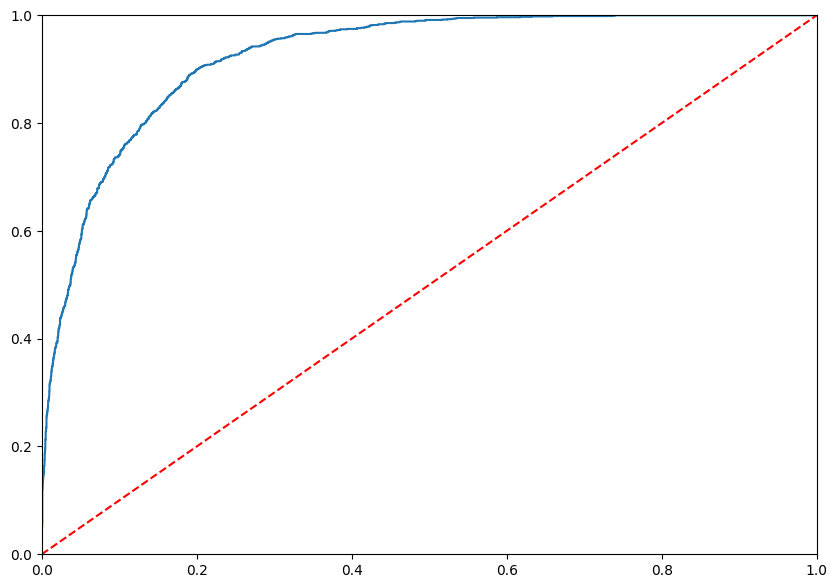

In [91]:
from sklearn.metrics import roc_curve

y_pred = best_model.predict_proba(data_train[feature_cols])[:, 1]
test_auc = roc_auc_score(data_train[target_col], y_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(data_train[target_col], y_pred)[:2], label='ROC-кривая (area = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Случайная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.show()

выглядит уже получше

давайте еще XBoost посмотрим

In [95]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.2/124.9 MB 654.6 kB/s eta 0:03:11
   ---------------------------------------- 0.3/124.9 MB 983.0 kB/s eta 0:02:07
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.2/124.9 MB 3.0 MB/s eta 0:00:42
    ---------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import xgboost

In [103]:
xboost_pipeline = Pipeline(steps=[
    ('grid_and_preprocessing', column_transformer),
    ('xb', xgboost.XGBClassifier())
])

In [104]:
search_xboost = GridSearchCV(xboost_pipeline, [{
    'xb__max_depth': [5, 6, 7],
    'xb__min_child_weight': [0.5, 1, 1.5],
}], scoring="roc_auc", cv=5)

In [105]:
search_xboost.fit(data_train[feature_cols], data_train[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('grid_and_preprocessing',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid=[{'xb__max_depth': [5, 6, 7],
                          'xb__min_child_weight': [0.5, 1, 1.5]}],
             scoring='roc_auc')

In [106]:
search_xboost.best_params_, search_xboost.best_score_

({'xb__max_depth': 5, 'xb__min_child_weight': 1}, 0.8194995175422193)

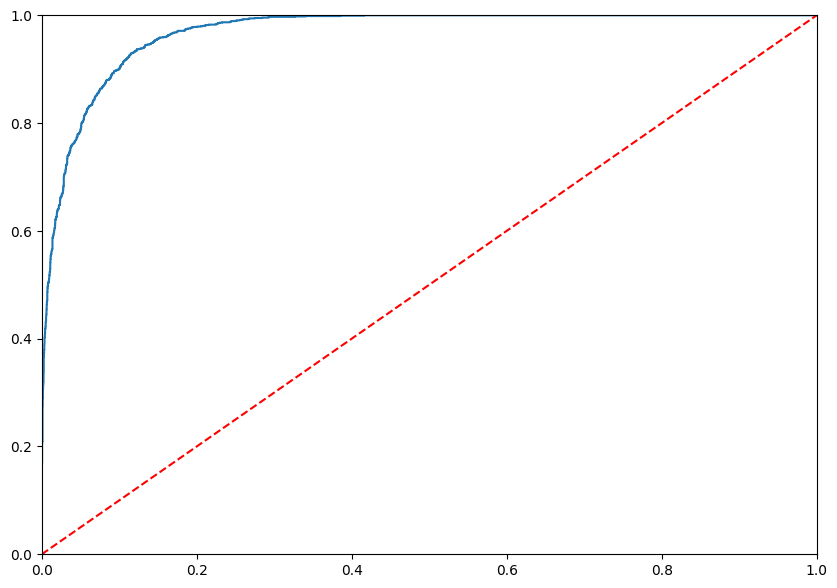

In [107]:
from sklearn.metrics import roc_curve

y_pred = search_xboost.best_estimator_.predict_proba(data_train[feature_cols])[:, 1]
test_auc = roc_auc_score(data_train[target_col], y_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(data_train[target_col], y_pred)[:2], label='ROC-кривая (area = {:.2f})'.format(test_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Случайная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.show()

In [108]:
test_auc

0.9683400706453881

супер)

UPD: тем не менее cat boost дает на 0.05 лучше рещультат на kaggle

# Предсказания

In [117]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = pd.to_numeric(X_test['TotalSpent'], errors='coerce')
X_test['TotalSpent'] = X_test['TotalSpent'].fillna(0)
submission = pd.read_csv('./submission.csv', index_col=0)

submission['Churn'] = search_xboost.best_estimator_.predict_proba(X_test)[:, 1]#, не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

In [118]:
submission

,Churn
Id,
0,0.049074
1,0.745704
2,0.525656
3,0.078494
4,0.000086
...,...
1756,0.328434
1757,0.004152
1758,0.934174


Лучшее решение отправьте в Stepik.

In [119]:
0.8403 

0.8403

давно Штирлец не был так близко к провалу:)